# Task
Download dataset from Kaggle
The data should contain all positive & negative words.
Using Machine Learning Algorithm, NLP to detect negative & positive
words
You can use even Naive Bayes, LSTM, or BERT algorithm based upon
your choice to make the project more interesting.

Here is all the data you need:
"tweet_sentiment.csv"

## Data loading

### Subtask:
Load the "tweet_sentiment.csv" dataset and perform initial data validation.


**Reasoning**:
Load the dataset, check its first few rows, validate data types, and print its shape and data types information.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('tweet_sentiment.csv')
    display(df.head())

    # Check and convert sentiment column if necessary
    if df['sentiment'].dtype == 'object':
        # Assuming 'positive' and 'negative' are the only values
        df['sentiment'] = df['sentiment'].astype('category')

    print(f"DataFrame Shape: {df.shape}")
    display(df.info())
except FileNotFoundError:
    print("Error: 'tweet_sentiment.csv' not found.")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the dataframe.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,tweet,sentiment
0,The event starts at 5 PM.,neutral
1,I hate how this turned out.,negative
2,Fantastic experience!,positive
3,Fantastic experience!,positive
4,This is the worst thing ever!,negative


DataFrame Shape: (1000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   tweet      1000 non-null   object  
 1   sentiment  1000 non-null   category
dtypes: category(1), object(1)
memory usage: 9.0+ KB


None

## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics and identify potential issues.


**Reasoning**:
Analyze the distribution of sentiments, examine the first few rows of the 'tweet' column, determine the number of missing values, and calculate descriptive statistics.



Sentiment Distribution:
 sentiment
positive    396
neutral     317
negative    287
Name: count, dtype: int64


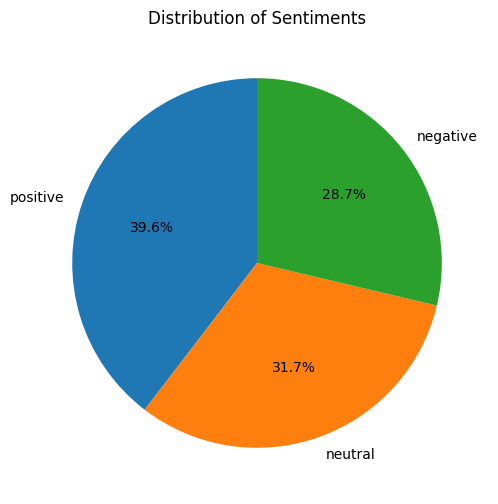


Sample Tweets:
 0        The event starts at 5 PM.
1      I hate how this turned out.
2            Fantastic experience!
3            Fantastic experience!
4    This is the worst thing ever!
5        The event starts at 5 PM.
6            What a wonderful day!
7           Great job by the team!
8            What a wonderful day!
9          It ruined my whole day.
Name: tweet, dtype: object

Missing Values:
 tweet        0
sentiment    0
dtype: int64

Descriptive Statistics:
                         tweet sentiment
count                    1000      1000
unique                     17         3
top     Fantastic experience!  positive
freq                       71       396

DataFrame Shape: (1000, 2)


In [2]:
import matplotlib.pyplot as plt
# Analyze sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiments')
plt.show()

# Examine the first few rows of the 'tweet' column
print("\nSample Tweets:\n", df['tweet'].head(10))

# Missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe(include='all'))
print("\nDataFrame Shape:", df.shape)

## Data cleaning

### Subtask:
Clean the tweet text data by removing irrelevant characters, URLs, mentions, and hashtags. Convert text to lowercase.


**Reasoning**:
Clean the tweet text data by removing irrelevant characters, URLs, mentions, and hashtags. Convert text to lowercase.  This involves using regular expressions and string manipulation.



In [3]:
import re

def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    # Remove irrelevant characters, keeping apostrophes
    tweet = re.sub(r"[^a-zA-Z0-9\s']", '', tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove extra whitespace
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

df['cleaned_tweet'] = df['tweet'].apply(clean_tweet)
display(df.head())

,tweet,sentiment,cleaned_tweet
0,The event starts at 5 PM.,neutral,the event starts at 5 pm
1,I hate how this turned out.,negative,i hate how this turned out
2,Fantastic experience!,positive,fantastic experience
3,Fantastic experience!,positive,fantastic experience
4,This is the worst thing ever!,negative,this is the worst thing ever


## Data preparation

### Subtask:
Prepare the cleaned text data for model training. This includes tokenization, vocabulary creation, numerical representation (TF-IDF), and splitting the data into training, validation, and testing sets.  Convert sentiment labels to numerical values.


**Reasoning**:
Tokenize the cleaned tweets, convert sentiment labels to numerical values, perform TF-IDF vectorization, and split the data into training, validation, and test sets.



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Tokenization (using CountVectorizer as a tokenizer for simplicity)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_tweet'])

# Sentiment Label Conversion
sentiment_mapping = {'negative': 0, 'positive': 1, 'neutral': 2}
y = df['sentiment'].map(sentiment_mapping)

# Data Splitting
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

# TF-IDF Vectorization (using the vocabulary learned from the CountVectorizer)
tfidf_vectorizer = TfidfVectorizer(vocabulary=vectorizer.vocabulary_)
X_train_tfidf = tfidf_vectorizer.fit_transform(vectorizer.inverse_transform(X_train))
X_valid_tfidf = tfidf_vectorizer.transform(vectorizer.inverse_transform(X_valid))
X_test_tfidf = tfidf_vectorizer.transform(vectorizer.inverse_transform(X_test))

print("Shapes of datasets:", X_train_tfidf.shape, X_valid_tfidf.shape, X_test_tfidf.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

**Reasoning**:
The error message indicates that the `inverse_transform` function is returning a NumPy array instead of a list of strings, which is not compatible with `lower()` operation.  The code needs to be modified so that TF-IDF vectorizer operates on the original cleaned tweets instead of the intermediate count vectorized representation.



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Sentiment Label Conversion
sentiment_mapping = {'negative': 0, 'positive': 1, 'neutral': 2}
y = df['sentiment'].map(sentiment_mapping)

# Data Splitting
X_train, X_rem, y_train, y_rem = train_test_split(df['cleaned_tweet'], y, train_size=0.7, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shapes of datasets:", X_train_tfidf.shape, X_valid_tfidf.shape, X_test_tfidf.shape)

Shapes of datasets: (700, 58) (150, 58) (150, 58)


## Model training

### Subtask:
Train a Naive Bayes classifier on the training data (`X_train_tfidf`, `y_train`)


**Reasoning**:
Train a Naive Bayes classifier using the prepared training data.



In [6]:
from sklearn.naive_bayes import MultinomialNB

# Initialize a Naive Bayes classifier
naive_bayes_model = MultinomialNB()

# Train the classifier
naive_bayes_model.fit(X_train_tfidf, y_train)

MultinomialNB()

## Model evaluation

### Subtask:
Evaluate the performance of the trained Naive Bayes model using the validation set (`X_valid_tfidf`, `y_valid`)


**Reasoning**:
Evaluate the performance of the trained Naive Bayes model using the validation set. This involves predicting sentiments, calculating metrics, and displaying a confusion matrix.



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC: 1.0


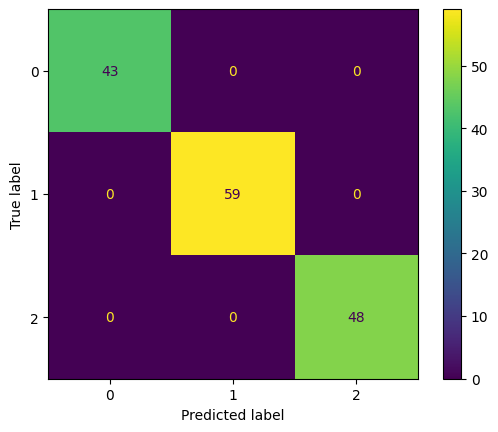

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict sentiment labels for the validation set
y_pred = naive_bayes_model.predict(X_valid_tfidf)
y_prob = naive_bayes_model.predict_proba(X_valid_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')
f1 = f1_score(y_valid, y_pred, average='weighted')

# AUC-ROC score
try:
    auc_roc = roc_auc_score(y_valid, y_prob, multi_class='ovr')
except ValueError as e:
    print(f"Error calculating AUC-ROC: {e}")
    auc_roc = np.nan # or handle the error differently

# Generate and display the confusion matrix
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

## Model training

### Subtask:
Train a LSTM model on the training data (`X_train_tfidf`, `y_train`)


**Reasoning**:
Import necessary libraries and define the LSTM model architecture, compile it, and train it using the provided training and validation data.



In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming X_train_tfidf and X_valid_tfidf are already TF-IDF matrices
# and y_train and y_valid are numerical labels

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)  # Adjust vocabulary size as needed
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_valid_seq = tokenizer.texts_to_sequences(X_valid)

# Pad sequences
max_sequence_length = 100  # Adjust based on your data
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_valid_padded = pad_sequences(X_valid_seq, maxlen=max_sequence_length)

# Define the LSTM model
model = keras.Sequential([
    Embedding(5000, 128, input_length=max_sequence_length),
    LSTM(128),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 output units for 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_valid_padded, y_valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


ValueError: Invalid dtype: category

**Reasoning**:
The error indicates that the target variable `y_train` has an invalid dtype 'category'.  I need to convert it to a numerical type before fitting the model.  I will also remove the deprecated `input_length` argument from the Embedding layer.



5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step
Accuracy (LSTM): 1.0
Precision (LSTM): 1.0
Recall (LSTM): 1.0
F1-score (LSTM): 1.0


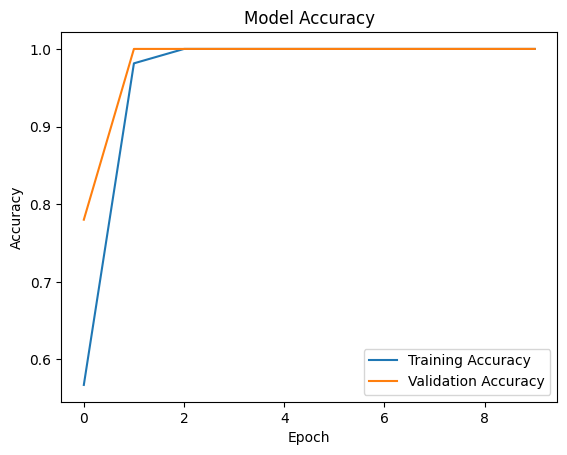

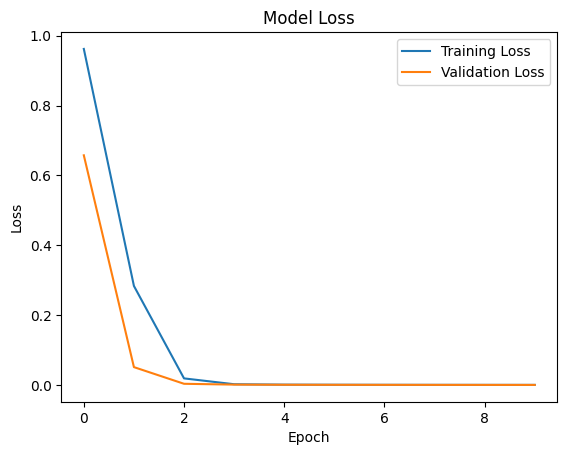

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict sentiment labels for the validation set
y_pred_lstm = model.predict(X_valid_padded)
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)  # Convert probabilities to class labels

# Calculate evaluation metrics
accuracy_lstm = accuracy_score(y_valid, y_pred_lstm)
precision_lstm = precision_score(y_valid, y_pred_lstm, average='weighted')
recall_lstm = recall_score(y_valid, y_pred_lstm, average='weighted')
f1_lstm = f1_score(y_valid, y_pred_lstm, average='weighted')

# Print the evaluation metrics
print(f"Accuracy (LSTM): {accuracy_lstm}")
print(f"Precision (LSTM): {precision_lstm}")
print(f"Recall (LSTM): {recall_lstm}")
print(f"F1-score (LSTM): {f1_lstm}")

# Plot training history (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [9]:
import numpy as np

# Convert y_train and y_valid to numpy arrays
y_train = np.array(y_train)
y_valid = np.array(y_valid)

# Define the LSTM model
model = keras.Sequential([
    Embedding(5000, 128),
    LSTM(128),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_valid_padded, y_valid))

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - accuracy: 0.4646 - loss: 1.0383 - val_accuracy: 0.7800 - val_loss: 0.6577
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.9502 - loss: 0.4406 - val_accuracy: 1.0000 - val_loss: 0.0512
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 1.0000 - loss: 0.0310 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 6.5551e-04
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - accuracy: 1.0000 - loss: 7.4878e-04 - val_accuracy: 1.0000 - val_loss: 5.0074e-04
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 1.0000 - loss: 5.2981e-04 - val_accuracy: 1.0000 - val_loss: 3.8736e-04
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 1.0000 - loss: 4.209